In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the csv file
df = pd.read_csv('https://raw.githubusercontent.com/IITH-Epoch/Epoch-Session-2/main/session2.csv')

In [3]:
# lets have a look at the dataframe
df.head()

,rating,extras_canteen,total_budget
0,4.0,500.0,1000.0
1,5.0,360.0,1000.0
2,5.5,1500.0,4000.0
3,8.1,700.0,2000.0
4,8.0,100.0,500.0


In [4]:
# it's good to know what data types each column of our data contains. This function allso tells us if there are any null values in our data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating          50 non-null     float64
 1   extras_canteen  49 non-null     float64
 2   total_budget    49 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [5]:
# we can see that total_budget and extras_canteen contains one null value, so, we'll have to replace it.
# We can either drop the rows with null values or replace it with some other value.
# Generally if there are many null values then dropping them can cause loss of information for other features.
df.total_budget.fillna(df.total_budget.median(),inplace=True)
df.extras_canteen.fillna(df.extras_canteen.median(),inplace=True)

In [6]:
# Let's have a look at our dataframe again.
# We can see that there are no null values present now.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating          50 non-null     float64
 1   extras_canteen  50 non-null     float64
 2   total_budget    50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [7]:
# We will create a new column called 'percentage' which will be equal to the % of total budget spent on canteen and extras
df['percentage'] = df['extras_canteen']/df['total_budget']

In [8]:
# we can see that now our data frame contains a new column 'precentage'
df.head()

,rating,extras_canteen,total_budget,percentage
0,4.0,500.0,1000.0,0.500
1,5.0,360.0,1000.0,0.360
2,5.5,1500.0,4000.0,0.375
3,8.1,700.0,2000.0,0.350
4,8.0,100.0,500.0,0.200


In [9]:
# we split our data frame into training and testing parts.
train_df = df[0:40]
test_df = df[40:]

In [10]:
# Now we will seperate our feature variables and target variables
train_samples = train_df.drop(['percentage','extras_canteen','total_budget'],axis=1)
train_labels = train_df['percentage']
test_samples = test_df.drop(['percentage','extras_canteen','total_budget'],axis=1)
test_labels = test_df['percentage']

In [11]:
# Convert the pandas data frame to numpy arrays
x, y, xt, yt = train_samples.to_numpy(), train_labels.to_numpy(), test_samples.to_numpy(), test_labels.to_numpy()

In [12]:
# Now we will add a column of ones which will account for the intercept parameter
x = np.c_[ np.ones(x.T[0].shape), x]
xt = np.c_[ np.ones(xt.T[0].shape), xt]

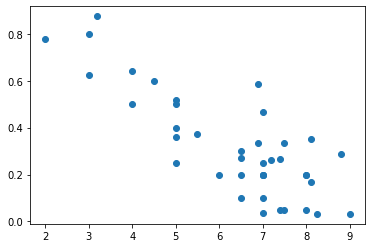

In [13]:
# Let's have a look at the data distribution
plt.scatter(x[:,1],y)
# x[:,i] means i'th column of x. Here 0th column is all ones and first column is the mess rating

In [14]:
n = x[0].size
m = y.size
n,m

(2, 40)

In [15]:
# Define the hypothesis function
def h(x,t):
    return x@t

In [16]:
# initialize the values of parameters.
# We can take any value but it is generally taken to be all zeros or all ones.
t = np.zeros(n,dtype='float')

# We can calculate our Loss function using this method
# J = 0
# for i in range (0,m):
#     J += (1/(2*m))*pow(h(x[i],t) - y[i],2)

# Though the upper method is correct, it will be slow if we have a large dataset
# Hence we can further optimize this code by writing it in matrix form.
# The major reason that writing code in matrix form and letting numpy do the maultiplication and summation is that,
# the part of numpy library which does these matrix manipulations is written in C language.
# And also, ofcourse, the code used in numpy is already highly optimized.
J = (1/(2*m))*((h(x,t)-y)@(h(x,t)-y).T)
J

0.07653937550127875

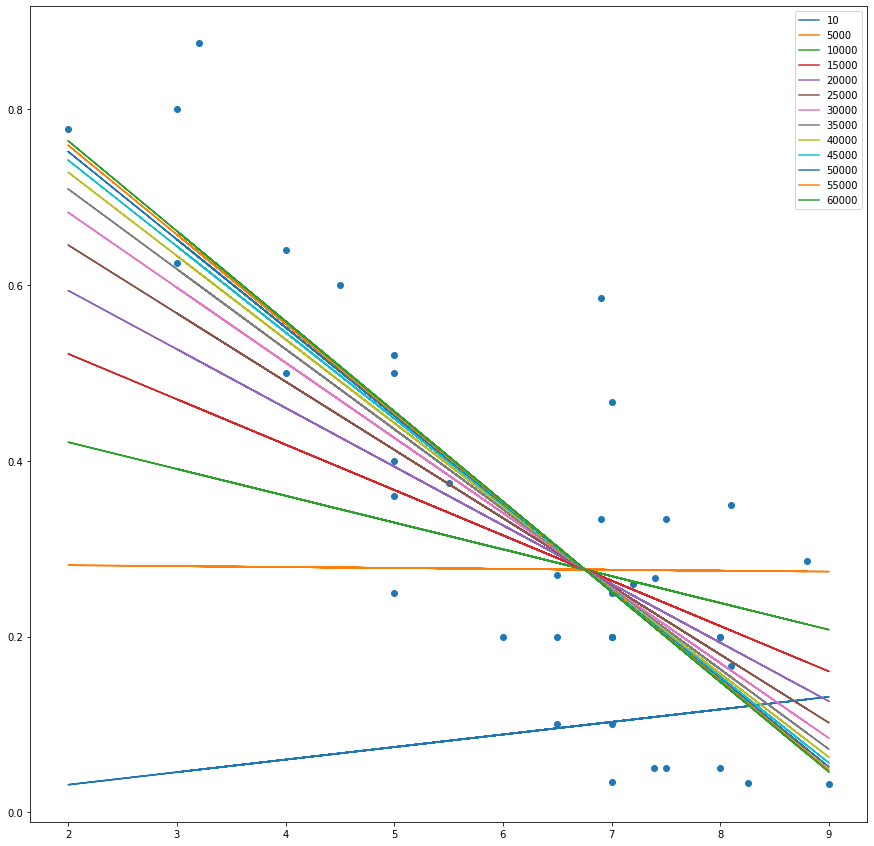

In [17]:
# take a value of learning rate. You can take a smaller or larger value of a to see how it affects the convergence.
a = 0.001
# We'll keep the count of no. of iterations. Not really needed but we can draw a pretty cool graph with this. :)
it = 0
# Just a random variable
rv = 10
# temp = np.zeros(n,dtype='float')
# set the size of graph as much as you like
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.scatter(x[:,1],y)
while True:

    # Update the parameters as follows
    # temp is used to calculate the new parameters using old parameters and update the parameters all at once.
    # for j in range (0,n):
    #     temp[j] = t[j] - (x@t - y)@((x.T)[j])*a/m
    # t = temp

    # But just like in the case of cost function, we can optimize the code by using some dot products :p
    t -= a*(x@t - y).T@x/m

    # keep our old cost function value in the varible k.
    k=J
    # calculate the value of cost function with the updated parameteres
    J = (1/(2*m))*((x@t-y)@(x@t-y).T)

    # increase the no. of iterations
    it += 1
    
    # plot the cool lines when no. of iterations = 10, 5000, 10000 and so on.
    if it%rv == 0:
        plt.plot(x[:,1],h(x,t),label=it)
        rv = 5000

    # check the difference between old and new cost function value and break out of loop if convergence is reached.
    if abs(k-J)<1e-9:
        break

plt.legend()

We can see that we start with a pretty random line and move towards the best line as the no. of iterations increases.
Also, we can see that as we get closer to the best fit line, the change between each line becomes smaller and smaller.

In [18]:
# We can get the best line without any iterations using the normal equation :3
t1 = (np.linalg.pinv((x.T)@x))@((x.T)@y)

# Calculating inverse is O(n^3). So, not to be used when no. of features is too high :(
# But it will rarely happen :P 

# Note that it is possible that (x.T)@x can be singular. Hence, we use pseudo-inverse of matrix.
# If matrix is not singular pseudo-inverse will be equal to the inverse.
# But if matrix is singular, pinv gives the best possible approximation to inverse.

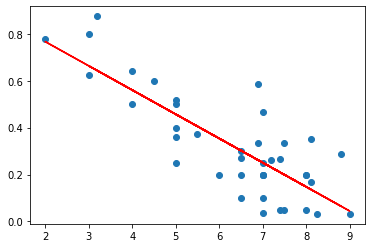

In [19]:
# Let's see how our line is fiiting the training data
plt.scatter(x[:,1],y)
plt.plot(x[:,1],h(x,t),color='red')

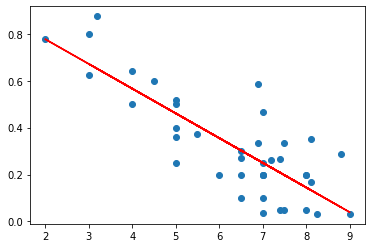

In [20]:
# Line obtained from normal equation
plt.scatter(x[:,1],y)
plt.plot(x[:,1],h(x,t1),color='red')

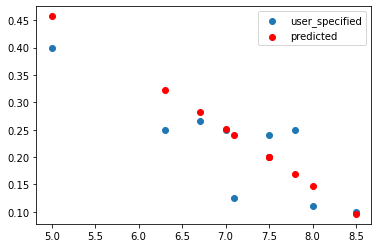

In [21]:
# This is how our line fits on the testing data set
plt.scatter(xt[:,1],yt,label='user_specified')
plt.scatter(xt[:,1],h(xt,t),color='red',label='predicted')
plt.legend()

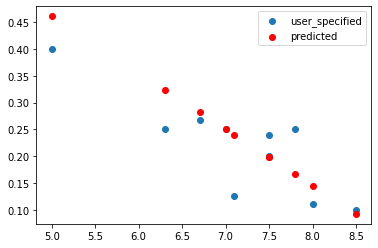

In [22]:
# Normal equation line
plt.scatter(xt[:,1],yt,label='user_specified')
plt.scatter(xt[:,1],h(xt,t1),color='red',label='predicted')
plt.legend()

In [23]:
# Not too bad :P